In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

597

Get city weather data
-----------------------

In [6]:
# Import the requests library
import requests

# Import the API key from the config file
from config import weather_api_key

In [7]:
# Starting URL or Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [8]:
# Import the datetime module from the datetime library
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of hte logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 #Should this be incrementing??
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record count
    record_count += 1
    
    # ------------------------------------
    # Run an API request for each of teh cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the city information into city_data list
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that data loading is complete
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | grand-santi
Processing Record 2 of Set 1 | nizhniy kuranakh
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | yumen
Processing Record 6 of Set 1 | rungata
City not found. Skipping...
Processing Record 7 of Set 1 | gurh
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | sola
Processing Record 11 of Set 1 | marsh harbour
Processing Record 12 of Set 1 | kuche
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | kupang
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | washington
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | cayenne
Processi

Processing Record 34 of Set 4 | mahebourg
Processing Record 35 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 36 of Set 4 | belmopan
Processing Record 37 of Set 4 | ramon
Processing Record 38 of Set 4 | guerrero negro
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | ozernovskiy
Processing Record 41 of Set 4 | yulara
Processing Record 42 of Set 4 | ulaanbaatar
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | raudeberg
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | menongue
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | iskateley
Processing Record 50 of Set 4 | saint george
Processing Record 1 of Set 5 | sisimiut
Processing Record 2 of Set 5 | diu
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | alta
Processing Record 6 of Set 5 | udachnyy
Processing Re

Processing Record 26 of Set 8 | kutum
Processing Record 27 of Set 8 | kruisfontein
Processing Record 28 of Set 8 | bazarnyye mataki
Processing Record 29 of Set 8 | kayerkan
Processing Record 30 of Set 8 | shirochanka
Processing Record 31 of Set 8 | chubbuck
Processing Record 32 of Set 8 | taunggyi
Processing Record 33 of Set 8 | hamadan
Processing Record 34 of Set 8 | monze
Processing Record 35 of Set 8 | seoul
Processing Record 36 of Set 8 | karaul
City not found. Skipping...
Processing Record 37 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 8 | huarmey
Processing Record 39 of Set 8 | egvekinot
Processing Record 40 of Set 8 | san rafael
Processing Record 41 of Set 8 | le havre
Processing Record 42 of Set 8 | atambua
Processing Record 43 of Set 8 | deputatskiy
Processing Record 44 of Set 8 | ulagan
Processing Record 45 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 46 of Set 8 | port hardy
Processing Record 47 of Set 8 | 

Processing Record 13 of Set 12 | malakal
Processing Record 14 of Set 12 | springfield
Processing Record 15 of Set 12 | paducah
Processing Record 16 of Set 12 | swadlincote
Processing Record 17 of Set 12 | orange cove
Processing Record 18 of Set 12 | bosobolo
Processing Record 19 of Set 12 | strezhevoy
Processing Record 20 of Set 12 | chifeng
Processing Record 21 of Set 12 | hasaki
Processing Record 22 of Set 12 | talara
Processing Record 23 of Set 12 | urumqi
Processing Record 24 of Set 12 | izvestkovyy
Processing Record 25 of Set 12 | papenburg
Processing Record 26 of Set 12 | puerto morazan
Processing Record 27 of Set 12 | williston
Processing Record 28 of Set 12 | el sauzal
Processing Record 29 of Set 12 | salto
Processing Record 30 of Set 12 | erzin
Processing Record 31 of Set 12 | sherlovaya gora
Processing Record 32 of Set 12 | pestovo
Processing Record 33 of Set 12 | bilma
Processing Record 34 of Set 12 | onega
Processing Record 35 of Set 12 | tiarei
Processing Record 36 of Set 

In [10]:
len(city_data)

547

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand-Santi,4.2500,-54.3833,76.06,86,50,4.16,GF,2021-03-25 21:56:52
1,Nizhniy Kuranakh,58.8353,125.4869,6.15,94,100,2.75,RU,2021-03-25 21:56:52
2,Rikitea,-23.1203,-134.9692,79.68,72,69,17.60,PF,2021-03-25 21:56:52
3,Jamestown,42.0970,-79.2353,68.00,40,1,7.43,US,2021-03-25 21:55:33
4,Yumen,40.2833,97.2000,41.29,37,11,6.53,CN,2021-03-25 21:56:53
5,Gurh,24.5167,81.5167,71.47,16,0,1.59,IN,2021-03-25 21:56:53
6,Ushuaia,-54.8000,-68.3000,50.00,50,40,24.16,AR,2021-03-25 21:55:03
7,Kodiak,57.7900,-152.4072,44.60,53,1,3.44,US,2021-03-25 21:56:53
8,Sola,-13.8833,167.5500,82.40,83,40,8.30,VU,2021-03-25 21:56:54
9,Marsh Harbour,26.5412,-77.0636,77.05,76,9,13.85,BS,2021-03-25 21:56:54


In [12]:
# Reorder the dataframe
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand-Santi,GF,2021-03-25 21:56:52,4.2500,-54.3833,76.06,86,50,4.16
1,Nizhniy Kuranakh,RU,2021-03-25 21:56:52,58.8353,125.4869,6.15,94,100,2.75
2,Rikitea,PF,2021-03-25 21:56:52,-23.1203,-134.9692,79.68,72,69,17.60
3,Jamestown,US,2021-03-25 21:55:33,42.0970,-79.2353,68.00,40,1,7.43
4,Yumen,CN,2021-03-25 21:56:53,40.2833,97.2000,41.29,37,11,6.53
5,Gurh,IN,2021-03-25 21:56:53,24.5167,81.5167,71.47,16,0,1.59
6,Ushuaia,AR,2021-03-25 21:55:03,-54.8000,-68.3000,50.00,50,40,24.16
7,Kodiak,US,2021-03-25 21:56:53,57.7900,-152.4072,44.60,53,1,3.44
8,Sola,VU,2021-03-25 21:56:54,-13.8833,167.5500,82.40,83,40,8.30
9,Marsh Harbour,BS,2021-03-25 21:56:54,26.5412,-77.0636,77.05,76,9,13.85


In [13]:
# Create the output file (CSV)
output_data_file = "Weather_data/cities.csv"

# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

Create plots of weather data
--------------

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

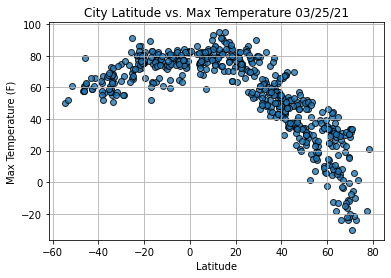

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig1.png")

# Show plot
plt.show()

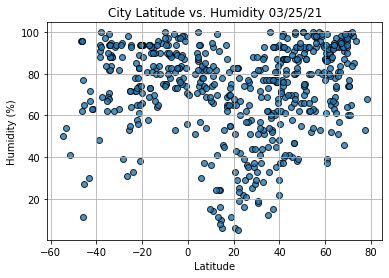

In [16]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig2.png")

# Show plot
plt.show()

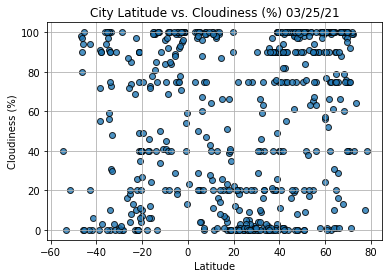

In [17]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig3.png")

# Show plot
plt.show()

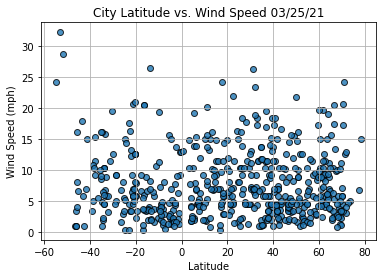

In [18]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig4.png")

# Show plot
plt.show()

Perform Linear Regression on City Weather Data
----------------------

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and 
# equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values*slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the regression line
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, fontsize=15)
    plt.show()

In [61]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2021-03-25 21:56:55
Lat                       22.0752
Lng                      -159.319
Max Temp                     77.0
Humidity                       83
Cloudiness                      1
Wind Speed                   4.61
Name: 13, dtype: object

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand-Santi,GF,2021-03-25 21:56:52,4.2500,-54.3833,76.06,86,50,4.16
1,Nizhniy Kuranakh,RU,2021-03-25 21:56:52,58.8353,125.4869,6.15,94,100,2.75
3,Jamestown,US,2021-03-25 21:55:33,42.0970,-79.2353,68.00,40,1,7.43
4,Yumen,CN,2021-03-25 21:56:53,40.2833,97.2000,41.29,37,11,6.53
5,Gurh,IN,2021-03-25 21:56:53,24.5167,81.5167,71.47,16,0,1.59


In [63]:
# Create Northern and Southern Hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

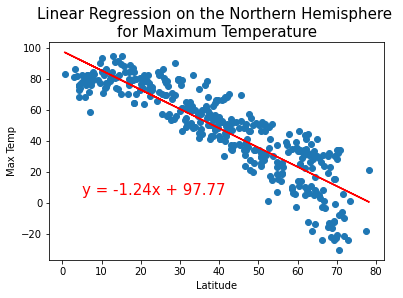

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                       'Max Temp', (5,5))

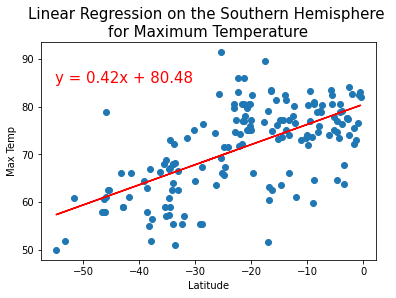

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                       'Max Temp', (-55,85))

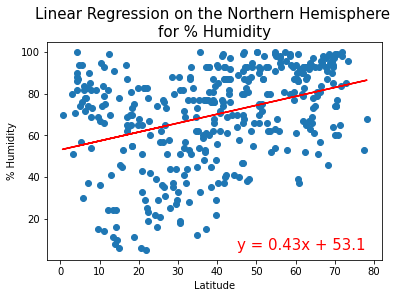

In [67]:
# Linear regression on the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', 
                       '% Humidity', (45,5))

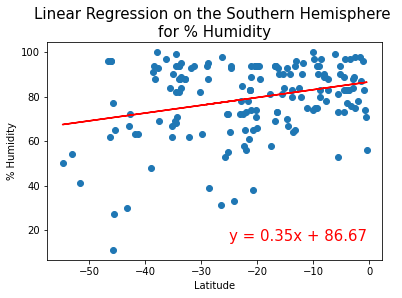

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       '% Humidity', (-25,15))

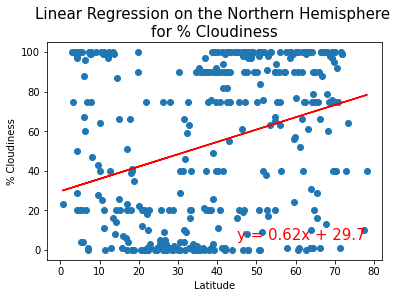

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness', (45,5))

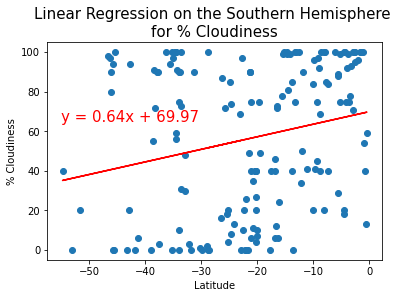

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness', (-55,65))

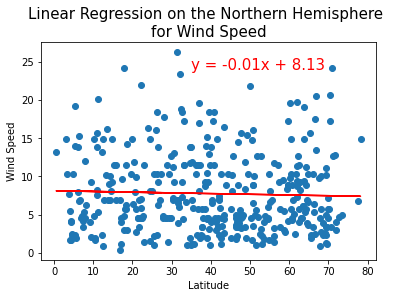

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed', (35,24))

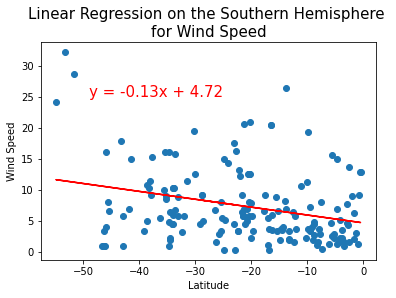

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 
                       'Wind Speed', (-49,25))